# End 

Resulting file, meant to help if you have problems

## Data Reading

In [1]:
# inports
import pandas as pd
import numpy as np

/var/folders/y0/7965kh491zq1473pp9pbww280000gn/T/ipykernel_55317/1105977490.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# reading in the data, whose csv file is in the repo
data = pd.read_csv('concrete_data.csv')

In [3]:
#getting the first 5 rows of the data
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
#getting a description of the data
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Feature Engineering

In [5]:
#getting the columns of the data
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

Looking at the data, the columns represent the amounts that are used, and the specfic age of the concrete. Let's convert the elements for the first 7 rows into percent values.

Of course, we're assuming that those values are all that makes up the concrete, but I hope that's correct, or at least <font color="red"> mostly </font>.

In [6]:
#finding the sum of the first six columns (the columns that matter here)
sum = data.iloc[:, 0:6].sum(axis=1)
print(sum)

0       1744.5
1       1759.5
2       1635.0
3       1635.0
4       1501.4
         ...  
1025    1541.3
1026    1462.1
1027    1487.7
1028    1522.3
1029    1513.4
Length: 1030, dtype: float64


In [7]:
for c_index in range(7): # for evert element 
    data.iloc[:, c_index] = (data.iloc[:, c_index] / sum) * 100

In [8]:
data

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,30.954428,0.000000,0.000000,9.286328,0.143308,59.615936,38.750358,28,79.99
1,30.690537,0.000000,0.000000,9.207161,0.142086,59.960216,38.420006,28,61.89
2,20.336391,8.715596,0.000000,13.944954,0.000000,57.003058,36.330275,270,40.27
3,20.336391,8.715596,0.000000,13.944954,0.000000,57.003058,36.330275,365,41.05
4,13.227654,8.818436,0.000000,12.788064,0.000000,65.165845,54.982017,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,17.932914,7.526114,5.858691,11.652501,0.577435,56.452345,49.847531,28,44.28
1026,22.036796,0.000000,7.906436,13.405376,0.711306,55.940086,55.632310,28,31.18
1027,9.981851,9.370169,7.299859,12.952880,0.410029,59.985212,52.429925,28,23.70
1028,10.451291,12.264337,0.000000,11.535177,0.742298,65.006897,51.822900,28,32.77


In [9]:
# let's look at the sum now
sum = data.iloc[:, 0:6].sum(axis=1)
print(sum)

0       100.0
1       100.0
2       100.0
3       100.0
4       100.0
        ...  
1025    100.0
1026    100.0
1027    100.0
1028    100.0
1029    100.0
Length: 1030, dtype: float64


## Model Training

Now for the model, let's start building it up. The first thing is the orient the data in such a way that it could be converted from a numpy array to a pytorch tensory. Unfortunately, the data has to be transformed

In [10]:
#let's first get the columns

# REMEMBER, we're going to have to use the first 7 columns to predict the last one
data_cols = data.iloc[:, 0:8]
y = data.iloc[:, 8]
data_cols, y


(         cement  blast_furnace_slag   fly_ash      water  superplasticizer  \
 0     30.954428            0.000000  0.000000   9.286328          0.143308   
 1     30.690537            0.000000  0.000000   9.207161          0.142086   
 2     20.336391            8.715596  0.000000  13.944954          0.000000   
 3     20.336391            8.715596  0.000000  13.944954          0.000000   
 4     13.227654            8.818436  0.000000  12.788064          0.000000   
 ...         ...                 ...       ...        ...               ...   
 1025  17.932914            7.526114  5.858691  11.652501          0.577435   
 1026  22.036796            0.000000  7.906436  13.405376          0.711306   
 1027   9.981851            9.370169  7.299859  12.952880          0.410029   
 1028  10.451291           12.264337  0.000000  11.535177          0.742298   
 1029  17.239329            6.640677  5.173781  13.254923          0.568257   
 
       coarse_aggregate  fine_aggregate   age  
 0

In [11]:
#now we have the data all split up, let's reshape them
stacked_data_cols = np.stack([data_cols[col] for col in   data_cols.columns], axis=1)
stacked_y = np.stack([y], axis=1)

In [12]:
# converting this to a tensor object
import torch

train_data = torch.tensor(stacked_data_cols, dtype=torch.float32)
target = torch.tensor(stacked_y, dtype=torch.float32)

In [13]:
train_data, target

(tensor([[ 30.9544,   0.0000,   0.0000,  ...,  59.6159,  38.7504,  28.0000],
         [ 30.6905,   0.0000,   0.0000,  ...,  59.9602,  38.4200,  28.0000],
         [ 20.3364,   8.7156,   0.0000,  ...,  57.0031,  36.3303, 270.0000],
         ...,
         [  9.9819,   9.3702,   7.2999,  ...,  59.9852,  52.4299,  28.0000],
         [ 10.4513,  12.2643,   0.0000,  ...,  65.0069,  51.8229,  28.0000],
         [ 17.2393,   6.6407,   5.1738,  ...,  57.1230,  50.3172,  28.0000]]),
 tensor([[79.9900],
         [61.8900],
         [40.2700],
         ...,
         [23.7000],
         [32.7700],
         [32.4000]]))

In [14]:
# creating the model
from torch import nn


class CementModel(nn.Module):
    # instatiating the model
    def __init__(self, layers, dropout=0.25, in_szes=8, out_szes=1):
        super().__init__()  # in order to use the methods of the parent class
        layer_list = [] # allows for variable layers
        
        # batch normalization, recentering the data and making the model more stable
        self.bn = nn.BatchNorm1d(in_szes)
        i = in_szes
        
        
        for l in layers:
            layer_list.append(nn.Linear(i, l)) # linear layer
            layer_list.append(nn.ReLU()) # relu layer (activation)
            layer_list.append(nn.Dropout(dropout)) # dropout layer
            layer_list.append(nn.BatchNorm1d(l)) # more batch normalization
            i = l
            
        layer_list.append(nn.Linear(layers[-1], out_szes)) # adding an output layer to end 
        self.layers = nn.Sequential(*layer_list) # creating the model
        
    def forward(self, x):
        x = self.bn(x) # applying batch normalization
        return self.layers(x)
        

## Testing and Training the Model

In [15]:
# creating a model
model = CementModel([100, 256, 512, 256, 100])

In [16]:
# having the optimizer and the criterion
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [17]:
import math # for the math

batch_size = math.floor(data.shape[0] * .8) # 80% of the data
test_size = data.shape[0] - batch_size # the rest of the data

In [18]:
# splitting the data
train = train_data[:batch_size] # splitting the training data into the first 80%
train_y = target[:batch_size] # splitting the target data into the first 80%
test = train_data[batch_size:] # splitting the training data into the last 20%
test_y = target[batch_size:] # splitting the target data into the last 20%

In [19]:
train.shape

torch.Size([824, 8])

In [20]:
import time
import math

start = (
    time.time()
)  # starting the timer - we want to get the total time it takes to train the model
losses = []  # to keep track of the losses
test_losses = []  # to keep track of the test losses
epochs = 1000  # the number of epochs

# loop through every element in the epochs
for epoch in range(epochs):
    y_pred = model(train)  # get the predictions of the model
    loss = criterion(y_pred, train_y)  # get the loss

    with torch.no_grad():  # getting the testing loss for the test data
        test_loss = criterion(model(test), test_y)
        test_losses.append(test_loss.detach().numpy())
    losses.append(loss.detach().numpy())

    if epoch % 100 != 0:  # setting a sus testing thing
        print(
            (
                f"Epoch {epoch}: loss {math.sqrt(loss):.8f}, testing loss {math.sqrt(test_losses[-1]):.8f}"
            ),
            end="\r",
        )
    else:
        print(
            (
                f"Epoch {epoch}: loss {math.sqrt(loss):.8f}, testing loss {math.sqrt(test_losses[-1]):.8f}"
            )
        )

    # performing the backprop
    optimizer.zero_grad()  # reset the gradients
    loss.backward()  # backprop
    optimizer.step()  # update the weights

end = time.time() #getting the end time

print("Duration: --- %s seconds ---" % (end - start))

Epoch 0: loss 40.56626764, testing loss 35.12367414
Epoch 100: loss 4.75698219, testing loss 16.13515513
Epoch 200: loss 4.07337950, testing loss 17.59892086
Epoch 300: loss 3.75105017, testing loss 17.55025395
Epoch 400: loss 3.50271773, testing loss 18.32785193
Epoch 500: loss 3.45633917, testing loss 17.82365502
Epoch 600: loss 3.29827996, testing loss 18.38876637
Epoch 700: loss 3.17556518, testing loss 17.60129983
Epoch 800: loss 3.10705188, testing loss 17.28043853
Epoch 900: loss 3.05154218, testing loss 17.81295315
Duration: --- 17.641129970550537 seconds ---78792336


## Modeling the Losses

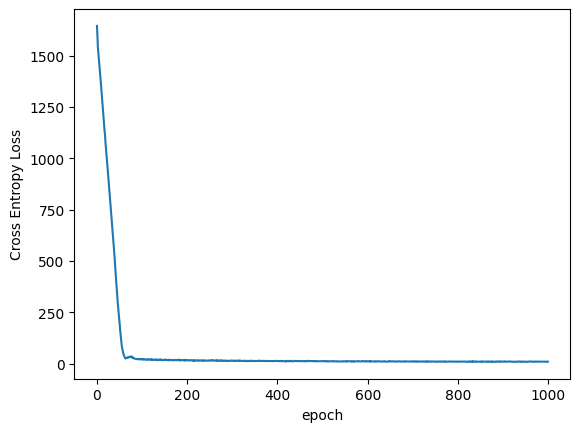

In [21]:
from matplotlib import pyplot as plt
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

In [22]:
# testing it out for ourselves
model.eval() # setting the model to evaluation mode

# making sure that no gradients accumulate
with torch.no_grad():
    
    inputs = np.array([])
    for column in data.columns[:8]: 
        item = input(f"What is your test value for: {column} ? \n")
        inputs = np.append(inputs, int(item))
        
        
    inputs = inputs.reshape(-1)
    print(model(torch.tensor([inputs], dtype = torch.float32)).detach().numpy()[0][0])
        

134.7896


/var/folders/y0/7965kh491zq1473pp9pbww280000gn/T/ipykernel_55317/1439461448.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  print(model(torch.tensor([inputs], dtype = torch.float32)).detach().numpy()[0][0])


# We're Done